In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [ ]:
!pip install transformers

In [3]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import torch
from PIL import Image

In [4]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

In [6]:
max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}

In [7]:
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds

In [11]:
predict_step(['/content/drive/MyDrive/GenAI/pictures/img1.jpg'])

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


['a large body of water with mountains']

In [12]:
import os

my_drive_path = "/content/drive/MyDrive/GenAI/pictures"

# Get a list of all the files in the My Drive folder
files = os.listdir(my_drive_path)

# Get a list of all the images in the My Drive folder
images = [file for file in files if file.endswith(".jpg") or file.endswith(".png")]

# Print the list of images
print(images)

['spotlight.jpg', 'Volcano.jpg', 'img6.jpg', 'img5.jpg', 'img4.jpg', 'img2.jpg', 'img3.jpg', 'img1.jpg']


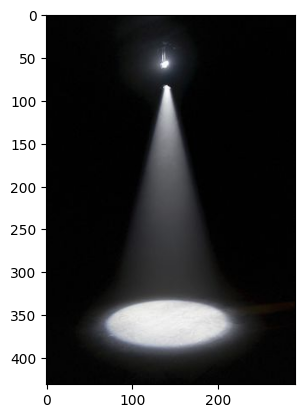

a lit up night scene with a lit up lamp


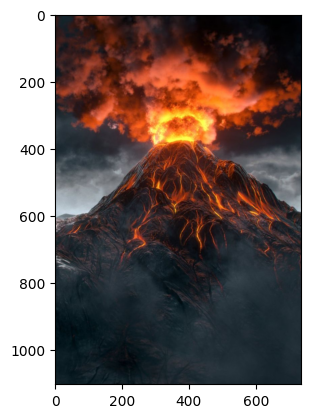

a mountain range with a sky background


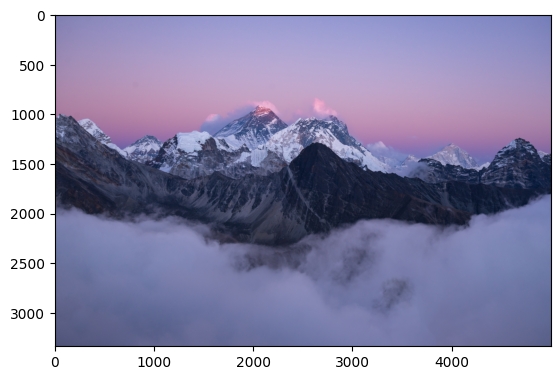

a mountain range with snow capped mountains


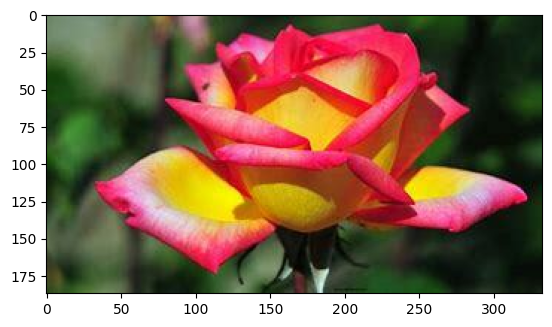

a pink rose in a red rose bush


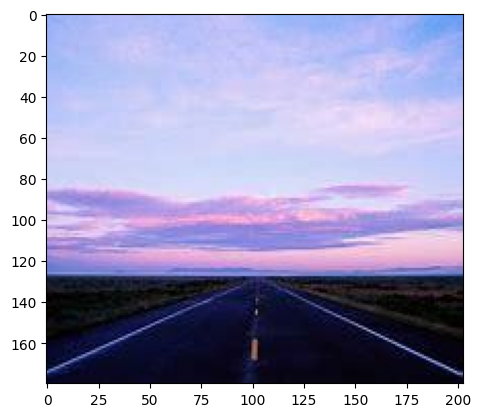

a blurry picture of a road in the distance


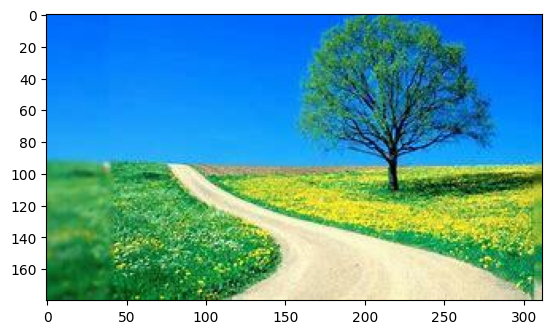

a single tree in the middle of a grassy field


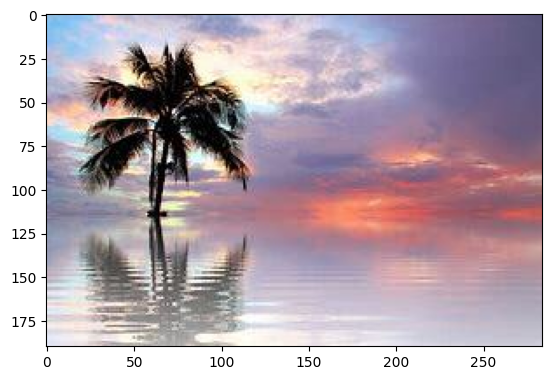

a sunset view of a beach with a sailboat in the distance


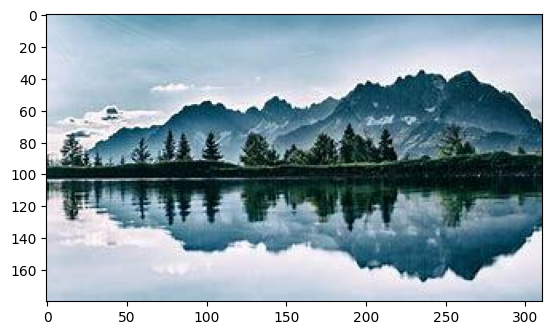

a large body of water with mountains
{'/content/drive/MyDrive/GenAI/pictures/spotlight.jpg': 'a lit up night scene with a lit up lamp', '/content/drive/MyDrive/GenAI/pictures/Volcano.jpg': 'a mountain range with a sky background', '/content/drive/MyDrive/GenAI/pictures/img6.jpg': 'a mountain range with snow capped mountains', '/content/drive/MyDrive/GenAI/pictures/img5.jpg': 'a pink rose in a red rose bush', '/content/drive/MyDrive/GenAI/pictures/img4.jpg': 'a blurry picture of a road in the distance', '/content/drive/MyDrive/GenAI/pictures/img2.jpg': 'a single tree in the middle of a grassy field', '/content/drive/MyDrive/GenAI/pictures/img3.jpg': 'a sunset view of a beach with a sailboat in the distance', '/content/drive/MyDrive/GenAI/pictures/img1.jpg': 'a large body of water with mountains'}


In [13]:
import matplotlib.pyplot as plt
my_drive_path = "/content/drive/MyDrive/GenAI/pictures"
img_caption = {}
for image in images:
  # Get the image path
  image_path = os.path.join(my_drive_path, image)

  # Display the image
  plt.imshow(plt.imread(image_path))
  plt.show()

  # Get the caption for the image
  caption = predict_step([image_path])[0]
  img_caption[image_path] = caption
  # Print the caption
  print(caption)

print(img_caption)

In [ ]:
!pip install langchain
!pip install langchain_community
!pip install sentence_transformers

In [14]:
!pip install faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 56.9 MB/s eta 0:00:00


In [15]:
import os
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import matplotlib.pyplot as plt
import faiss
import numpy as np

In [16]:
# Initialize the CLIP model and processor
model_name = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerNorm((512,), eps=1e-05,

In [17]:
# Function to get text embeddings
def get_text_embedding(text):
    inputs = processor(text=text, return_tensors="pt", padding=True).to(device)
    with torch.no_grad():
        text_features = model.get_text_features(**inputs)
    return text_features.cpu().numpy()

In [18]:
# Function to get image embeddings
def get_image_embedding(image_path):
    image = Image.open(image_path)
    inputs = processor(images=image, return_tensors="pt").to(device)
    with torch.no_grad():
        image_features = model.get_image_features(**inputs)
    return image_features.cpu().numpy()

In [19]:
# Generate and store embeddings for captions
captions = list(img_caption.values())
images = list(img_caption.keys())
caption_embeddings = np.vstack([get_text_embedding(caption) for caption in captions])

In [20]:
print(f"Caption embeddings shape: {caption_embeddings.shape}")

Caption embeddings shape: (8, 512)


In [21]:
dimension = caption_embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(caption_embeddings)

In [22]:
# Debug: Verify FAISS index size
print(f"FAISS index contains {index.ntotal} items")

FAISS index contains 8 items


In [23]:
# Function to search for similar images
def search_similar_images(query, k=1):
    query_embedding = get_text_embedding(query)
    distances, indices = index.search(query_embedding, k)

    similar_images = []
    for i, idx in enumerate(indices[0]):
        similar_images.append((images[idx], distances[0][i]))

    return similar_images

In [24]:
# Example query
def query(q):
  query = q
  similar_images = search_similar_images(query)

  # Debug: Verify the results of the search
  print(f"Found {len(similar_images)} similar images for the query '{query}'")

  # Display the similar images
  for image_path, distance in similar_images:
      print(f"Image: {image_path}, Distance: {distance:.4f}")
      if os.path.exists(image_path):  # Check if the image path exists
          image = Image.open(image_path)
          plt.imshow(image)
          plt.axis('off')  # Hide axis
          plt.title(f"Distance: {distance:.4f}")  # Show the distance as title
          plt.show()
      else:
          print(f"Image path '{image_path}' does not exist.")

Enter the caption to search image: a sunset view of a beach with a sailboat in the distance
Found 1 similar images for the query 'a sunset view of a beach with a sailboat in the distance'
Image: /content/drive/MyDrive/GenAI/pictures/img3.jpg, Distance: 0.0000


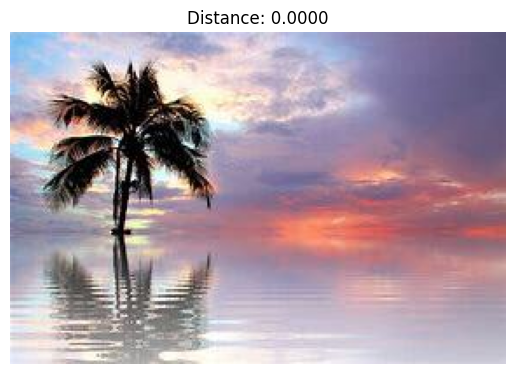

In [25]:
q=input("Enter the caption to search image: ")
query(q)